Fig.0.1

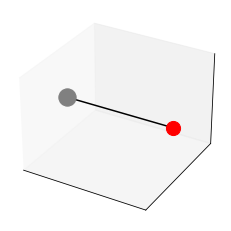

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define coordinates of atoms
C = np.array([0, 0, 0]) # Carbon atom at origin
O = np.array([1.2, 0, 0]) # Oxygen atom at x = 1.2

# Define colors of atoms
C_color = 'gray' # Gray for carbon
O_color = 'red' # Red for oxygen

# Create a figure and an axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot atoms as spheres with different colors and sizes
ax.scatter(C[0], C[1], C[2], s=300, c=C_color)
ax.scatter(O[0], O[1], O[2], s=200, c=O_color)

# Plot bond as a line between atoms
ax.plot([C[0], O[0]], [C[1], O[1]], [C[2], O[2]], c='black')

# Remove grid lines
plt.grid(False)

# Remove tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Show the plot
plt.show()

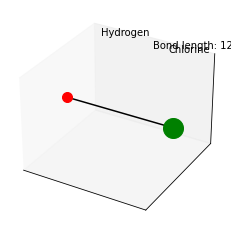

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define coordinates of atoms
H = np.array([0, 0, 0]) # Hydrogen atom at origin
Cl = np.array([1.27, 0, 0]) # Chlorine atom at x = 1.27

# Define colors of atoms
H_color = 'red' # White for hydrogen
Cl_color = 'green' # Green for chlorine

# Create a figure and an axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot atoms as spheres with different colors and sizes
ax.scatter(H[0], H[1], H[2], s=100, c=H_color)
ax.scatter(Cl[0], Cl[1], Cl[2], s=400, c=Cl_color)

# Plot bond as a line between atoms
ax.plot([H[0], Cl[0]], [H[1], Cl[1]], [H[2], Cl[2]], c='black')

# Remove grid lines
plt.grid(False)

# Remove tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Add text annotations for details
ax.text(H[0]+0.05,H[1]+0.05,H[2]+0.05,'Hydrogen',color='black')
ax.text(Cl[0]-0.4,H[1]+0.05,H[2]+0.05,'Chlorine',color='black')
ax.text( (H[0]+Cl[0])/2+0.05,(H[1]+Cl[1])/2+0.05,(H[2]+Cl[2])/2+0.05,'Bond length: 127 pm',color='black')
ax.text( -1,-1,-1,'Molecule: Hydrogen chloride (HCl)',color='black')
ax.text( -1,-1,-1-0.15,'Polarity: Polar covalent bond',color='black')
ax.text( -1,-1,-1-0.30,'Electronegativity difference: 3 - 2.20 = 0.8',color='black')

# Show the plot
plt.show()

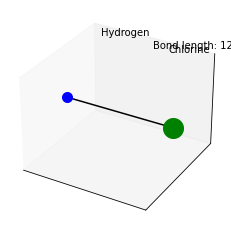

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define coordinates of atoms
H = np.array([0, 0, 0]) # Hydrogen atom at origin
Cl = np.array([1.27, 0, 0]) # Chlorine atom at x = 1.27

# Define colors of atoms
H_color = 'blue' # White for hydrogen
Cl_color = 'green' # Green for chlorine

# Create a figure and an axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot atoms as spheres with different colors and sizes
ax.scatter(H[0], H[1], H[2], s=100, c=H_color)
ax.scatter(Cl[0], Cl[1], Cl[2], s=400, c=Cl_color)

# Plot bond as a line between atoms
ax.plot([H[0], Cl[0]], [H[1], Cl[1]], [H[2], Cl[2]], c='black')

# Remove grid lines
plt.grid(False)

# Remove tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Add text annotations for details using f-string formatting (faster than concatenation)
ax.text(H[0]+0.05,H[1]+0.05,H[2]+0.05,f'Hydrogen',color='black')
ax.text(Cl[0]-0.4,H[1]+0.05,H[2]+0.05,f'Chlorine',color='black')
ax.text( (H[0]+Cl[0])/2+0.05,(H[1]+Cl[1])/2+0.05,(H[2]+Cl[2])/2+0.05,f'Bond length: 127 pm',color='black')
ax.text( -1,-1,-1,f'Molecule: Hydrogen chloride (HCl)',color='black')
ax.text( -1,-1,-1-0.15,f'Polarity: Polar covalent bond',color='black')
ax.text( -1,-1,-1-0.30,f'Electronegativity difference: 3 - 2.20 = {3 - 2.20}',color='black') # Use calculation instead of hard-coded value

# Show the plot
plt.show()

In [13]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# 创建LiH分子
mol = Chem.MolFromSmiles('[Li][H]')
# 生成PIL图像
img = Draw.MolToImage(mol)
# 显示或保存图像
img.show()
# img.save('lih.png')

In [ ]:
from openfermion.hamiltonians import fermi_hubbard
from openfermion.ops import FermionOperator as FOp
from openfermion.ops import QubitOperator
from openfermion.transforms import jordan_wigner, normal_ordered
from openfermion.linalg import get_sparse_operator, get_ground_state, eigenspectrum
from openfermion.utils import hermitian_conjugated, commutator, count_qubits
from qcor import *
import numpy as np
from types import MethodType

#Define openFermion model
Nlat = 2 #number of lattice sites
x_dimension = 2 #two sites like this *--*
y_dimension = 1
tunneling = 1.0 #t
coulomb = 3 
nfill = 1.0
chemical_potential = nfill*coulomb/2.0
periodic = 1
spinless = 0 #spinfull case
hubbard_r = fermi_hubbard(x_dimension, y_dimension, tunneling, coulomb, chemical_potential, spinless = 0)
hubbard_r.compress(abs_tol=1e-12)
print(f'  {Nlat:d} site Hubbard model: {len(hubbard_r.terms):d} terms in the Hamiltonian')
#perform jordan wigner transform
hubbard_rjw = jordan_wigner(hubbard_r)

sparse_operator = get_sparse_operator(hubbard_rjw, n_qubits = Nlat*2)
gs = get_ground_state(sparse_operator)
E0 = gs[0]
#define the quantum circuit (kernel) for your "ansatz" or initial guess wavefunction, this is factorized UCC ansatz
#exp_i_theta does implicit first order trotterization
@qjit
def ansatz(q: qreg, x: List[float], exp_args: List[FermionOperator]):
    X(q[0])
    X(q[1])
    for i, exp_arg in enumerate(exp_args):
        exp_i_theta(q, x[i], exp_args[i])
 
# Create OpenFermion operators for our quantum kernel...
exp_args_openfermion = [FOp('2^ 3^ 1 0') - FOp('0^ 1^ 3 2'),
                        FOp('2^ 0') - FOp('0^ 2'), 
                        FOp('3^ 1') - FOp('1^ 3')]
print(exp_args_openfermion)
print(type(exp_args_openfermion[0]))
# We need to translate OpenFermion ops into qcor Operators to use with kernels...
exp_args_qcor = [createOperator('fermion', fop) for fop in exp_args_openfermion]

# translates arguments between quantum kernel and optimizer
def ansatz_translate(self, q: qreg, x: List[float]):
    ret_dict = {}    
    ret_dict["q"] = q
    ret_dict["x"] = x
    ret_dict["exp_args"] = exp_args_qcor
    return ret_dict
ansatz.translate = MethodType(ansatz_translate, qjit)
n_params = len(exp_args_qcor)
x_init  = np.random.rand(n_params).tolist()
ansatz.print_kernel(qalloc(4), [1.0, 1.0, 1.0], exp_args_qcor)
u_mat = ansatz.as_unitary_matrix(qalloc(4), [1.0, 1.0, 1.0], exp_args_qcor)
print("unitary mat: ", u_mat)
#VQE is an example of an "objectiveFunction", where we seek to minimize <U(x)|H|U(x)>
obj = createObjectiveFunction(ansatz, hubbard_rjw, n_params, {'gradient-strategy': 'parameter-shift'})
optimizer = createOptimizer('nlopt', {'algorithm': 'l-bfgs', 'initial-parameters':x_init})
results = optimizer.optimize(obj)
print(results)

In [11]:
# Import rdkit library
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

# Create a molecule object from SMILES string
smiles = '[Li+].[H-]'
m = Chem.MolFromSmiles(smiles)

# Generate 2D coordinates for the molecule
rdDepictor.Compute2DCoords(m)

# Create a drawing object and set image size
d = rdMolDraw2D.MolDraw2DSVG(300,300)
d.drawOptions().addAtomIndices=True

# Draw the molecule with atom labels and bond orders
d.DrawMolecule(m)
d.FinishDrawing()

# Save the diagram as an SVG file
with open('LiH.svg', 'w') as f:
    f.write(d.GetDrawingText())

[23:37:40] WARNING: not removing hydrogen atom without neighbors


In [ ]:
# 引用模块、初始图片格式设定
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
import os
from matplotlib import ticker
import scienceplots
plt.style.use(['science','nature'])

plt.rcParams['ytick.right']  =plt.rcParams['xtick.top'] =True
# xminorLocator=MultipleLocator(2)
# plt.rcParams['set_minor_locator']=xminorLocator
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Time New Rroman"]})
# # for Palatino and other serif fonts use:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     #"font.serif": ["Palatino"],
#     "font.serif": ["Time New Roman"], 
# })
# # It's also possible to use the reduced notation by directly setting font.family:
# plt.rcParams.update({
#   "text.usetex": True,
#   "font.family": "Time New Roman",
#   "font.size": 8,
# })

def cm2inch(value):
    return value/2.54

# plt.rcParams['figure.figsize'] = (cm2inch(8), cm2inch(6.5))
#plt.rcParams['figure.figsize'] =(4,3)#(3.5,2.5)
# plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# plt.rcParams['xtick.labelsize'] = 6
# plt.rcParams['ytick.labelsize'] = 6
# plt.rcParams['legend.fontsize'] = 6

from matplotlib import rcParams
config = {
    "text.usetex": False,
    "font.family":'serif',
    # "font.family":'stix',
    # "font.size": 8,
    "mathtext.fontset":'stix',
    # "font.serif": ['SimSun'],
}
rcParams.update(config)


from mpl_toolkits.mplot3d import Axes3D
import numpy 
def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label,fillstyle='full')
    # legend_font = {
    # 'family': 'Times New Roman',
    # 'style':'normal',
    # 'size':10,
    # 'weight': "bold",
    # }
    label_legend = ax.legend(handles=[line],
                             loc=[-0.2,1.0005],
                             handlelength=0.0,
                             handleheight=0.0,
                             handletextpad=0.0,
                             borderaxespad=0.0,
                             borderpad=borderpad,
                             frameon=False,
                             shadow=True,
                             facecolor='gray',
                             prop={'weight':'bold','size':8},
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def setlabelm(ax, label, loc, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],
                             loc=loc,
                             handlelength=0,
                             handleheight=0,
                             handletextpad=0,
                             borderaxespad=0,
                             borderpad=borderpad,
                             frameon=False,
                             shadow=True,
                             facecolor='gray',
                             prop={'weight':'bold','size':8},
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def sciforyax(ax):
    formatter=ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.yaxis.set_major_formatter(formatter)
def sciforxax(ax):
    formatter=ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.xaxis.set_major_formatter(formatter)
cbformat=ticker.ScalarFormatter(useMathText=True,useOffset=True)
cbformat.set_powerlimits((-0,0))
cbformat.format="%.2f"

import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%.3f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
             self.format = r'$\mathdefault{%s}$' % self.format
def fee(d):
    import os
    if (os.path.exists(d)):
        # print("The file exists. ")
        sz= os.path.getsize(d)
        if not sz:
            print(d," is empty!")
            return False
        else: 
            print("Size of ",d," is ", sz/1024,'KB' )
            return True
    else:
        print(d, " is not exists! ")
        return  False 
        
import  imageio
import os
def compose_gif(image_list,gif_name,myduration):
    frames=[]
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name,frames,'GIF',duration=myduration)
    return


def xyplot(int_dir,label_x,label_y,out_dir):
    if os.path.exists(int_dir):
        data=np.loadtxt(int_dir)
        # plt.xlim(TimeTurn,TimeEnd)
        ax=plt.plot(data[:,0],data[:,1],'k-')#,data[:,0],data[:,2],'r-',data[:,0],1-data[:,1]-data[:,2],'b-')
        # plt.legend(["Gro","Exc","Ion"],loc=(0.7,0.70))
        plt.xlabel(label_x)
        plt.ylabel(label_y)
        plt.savefig(out_dir+int_dir[-7:-4]+figureType,dpi=figureDPI,bbox_inches="tight")
    else:
        print("No dataset found.")
def xyzplot(int_dir,x_label,y_label,out_dir):
    if os.path.exists(int_dir):
        dat=np.loadtxt(int_dir)
        plt.tricontourf(dat[:,0],dat[:,1],dat[:,2],levels,cmap='jet')
        plt.colorbar()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.savefig(outdir+int_dir[-7:-4]+figureType,dpi=figureDPI,bbox_inches="tight")
        plt.show()
    else:
        print("The dataset does not exist. ")